# Data Wrangling: WeRateDogs Twitter Data

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import warnings
import json
import timeit
from timeit import default_timer as timer
import tweepy
from tweepy import OAuthHandler
warnings.filterwarnings('ignore')
sns.set_context('poster')
%matplotlib inline

# Gathering Data
## 1-) WeRateDogs enhanced archive.
#### Download the file manually and upload it to the workspace.

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2-) Image Predictions File
#### Download the file programmatically using the requests library.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## 3-) Additional data for each tweet
#### Download additional data for each tweet via the Twitter API.

In [5]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        timestamp = tweet['created_at']
        retweeted = tweet['retweeted']
        followers_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'timestamp': timestamp,
                       'retweetd': retweeted,
                       'followers_count': followers_count})
api_df = pd.DataFrame(df_list)

In [6]:
#Checking tweet keys
print(tweet.keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [7]:
#Checking user keys
print(tweet['user'].keys())

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])


In [8]:
api_df.head()

,favorite_count,followers_count,retweet_count,retweetd,timestamp,tweet_id
0,39467,3200889,8853,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193
1,33819,3200889,6514,False,Tue Aug 01 00:17:27 +0000 2017,892177421306343426
2,25461,3200889,4328,False,Mon Jul 31 00:18:03 +0000 2017,891815181378084864
3,42908,3200889,8964,False,Sun Jul 30 15:58:51 +0000 2017,891689557279858688
4,41048,3200889,9774,False,Sat Jul 29 16:00:24 +0000 2017,891327558926688256


# Assessing Data

## Visual Assessment

In [9]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
api_df

,favorite_count,followers_count,retweet_count,retweetd,timestamp,tweet_id
0,39467,3200889,8853,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193
1,33819,3200889,6514,False,Tue Aug 01 00:17:27 +0000 2017,892177421306343426
2,25461,3200889,4328,False,Mon Jul 31 00:18:03 +0000 2017,891815181378084864
3,42908,3200889,8964,False,Sun Jul 30 15:58:51 +0000 2017,891689557279858688
4,41048,3200889,9774,False,Sat Jul 29 16:00:24 +0000 2017,891327558926688256
5,20562,3200889,3261,False,Sat Jul 29 00:08:17 +0000 2017,891087950875897856
6,12041,3200889,2158,False,Fri Jul 28 16:27:12 +0000 2017,890971913173991426
7,56848,3200889,16716,False,Fri Jul 28 00:22:40 +0000 2017,890729181411237888
8,28226,3200889,4429,False,Thu Jul 27 16:25:51 +0000 2017,890609185150312448
9,32467,3200889,7711,False,Wed Jul 26 15:59:51 +0000 2017,890240255349198849


## Programmatic Assessment

In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
retweetd           2354 non-null bool
timestamp          2354 non-null object
tweet_id           2354 non-null int64
dtypes: bool(1), int64(4), object(1)
memory usage: 94.3+ KB


In [15]:
archive_df.shape

(2356, 17)

In [16]:
image_predictions_df.shape

(2075, 12)

In [17]:
api_df.shape

(2354, 6)

In [18]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
archive_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
api_df.describe()

,favorite_count,followers_count,retweet_count,tweet_id
count,2354.000000,2.354000e+03,2354.000000,2.354000e+03
mean,8080.968564,3.200942e+06,3164.797366,7.426978e+17
std,11814.771334,4.457302e+01,5284.770364,6.852812e+16
min,0.000000,3.200799e+06,0.000000,6.660209e+17
25%,1415.000000,3.200898e+06,624.500000,6.783975e+17
50%,3603.500000,3.200945e+06,1473.500000,7.194596e+17
75%,10122.250000,3.200953e+06,3652.000000,7.993058e+17
max,132810.000000,3.201018e+06,79515.000000,8.924206e+17


In [21]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

### Quality
##### `archive_df`
- `timestamp` is a string not datetime.
- Dataframe has tweets that are retweets or replies.
- Dataframe has tweets that has no images.
- `Rating denominator` column has wrong values (should be 10).
- Has missing values in `expanded_url` column.
- `Tweet_id` columns has a datatype of int not string.
- In the newly created `dog_stage` column, convert the the none values to NaNs and separate the values that have two stages for example: `doggopuppo` with a '-' to be `doggo-puppo`.

##### `api_df`
- `timestamp` has a datatype of string instead of datetime.

### Tidiness
- `archive_df` has columns related to the retweets and replies that are irrelevant information or attributes to my analysis.
- `archive_df` has values represented as variables
- `image_predictions_df` has values represented as variables
- Retweet count and favorite count should be part of the `archive_df`

# Cleaning Data

In [22]:
#Making a copy of each dataframe
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

### Missing Data
#### expanded urls column in`archive_df` table has missing values.
##### Define
Drop the rows with missing expanded_urls values as for tweets without photos so those entries can be dropped safely.

#### Code

In [23]:
archive_df_clean = archive_df_clean[archive_df_clean['expanded_urls'].notnull()]

##### Test

In [24]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### The following columns (‘in_reply_to_status_id’, ‘in_reply_to_user_id’, 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')  in`archive_df` table has missing values.
##### Define
These rows will be utilized to shed the retweet and replies from our datasets and then will be dropped. Any row that have non-null values in those columns will be dropped.

#### Code

In [25]:
# Filter all rows for which the 'in_reply_to_status_id' and 'retweeted_status_id' is not null 
# because the rest of the columns are directly dependent on those two columns.
#First filter for the retweets:
retweet_entries = archive_df_clean.retweeted_status_id.notnull()

In [26]:
archive_df_clean[retweet_entries].shape[0]

180

In [27]:
# Dropping the retweets 
archive_df_clean = archive_df_clean[~retweet_entries]

In [28]:
#Second filter for the replies:
reply_entries = archive_df_clean.in_reply_to_status_id.notnull()

In [29]:
archive_df_clean[reply_entries].shape[0]

23

In [30]:
# Dropping the replies 
archive_df_clean = archive_df_clean[~reply_entries]

#### Test

In [31]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

#### The `archive_df` has tweets that have no images so they need to be dropped.
##### Define
Drop the tweets that have no images from the `archive_df` guides by the tweet IDs in the`image_predictions_df`.

##### Code

In [32]:
tweets_with_images = image_predictions_df_clean.tweet_id.unique()

In [33]:
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_images)] 

#### Test

In [34]:
archive_df_clean.shape

(1971, 17)

### Tidiness
#### 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' in `archive_df` need to be dropped.

#### Define
Drop all of these columns from the the `archive_df` table.

#### Code

In [35]:
#Drop the related columns to the retweest and replies as they have no values and no use in the dataset
archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [36]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


#### `archive_df` has values represented as variables

#### Define
Create a dog_stage column whose values are derived from the 4 stages columns (`doggo`, `pupper`, `puppo`, `floofer`), and drop the original 4 columns.

#### Code

In [37]:
(archive_df_clean.loc[:, 'doggo':"puppo"] != 'None').sum()

doggo       73
floofer      8
pupper     209
puppo       23
dtype: int64

In [38]:
archive_df_clean.loc[archive_df_clean.doggo == 'None', 'doggo'] = '' 
archive_df_clean.loc[archive_df_clean.floofer == 'None', 'floofer'] = '' 
archive_df_clean.loc[archive_df_clean.pupper == 'None', 'pupper'] = '' 
archive_df_clean.loc[archive_df_clean.puppo == 'None', 'puppo'] = '' 

In [39]:
archive_df_clean['dog_stage'] = archive_df_clean.doggo + archive_df_clean.pupper + archive_df_clean.floofer + archive_df_clean.puppo

In [40]:
archive_df_clean.loc[archive_df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [41]:
archive_df_clean.drop(['doggo', 'floofer', 'puppo', 'pupper'], axis=1, inplace=True)

#### Test

In [42]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


In [43]:
archive_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
716,783821107061198850,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,NaN
44,883838122936631299,2017-07-09 00:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,https://twitter.com/dog_rates/status/883838122...,12,10,Noah,NaN
625,795400264262053889,2016-11-06 22:59:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. He's trying to make the same fa...,https://twitter.com/dog_rates/status/795400264...,12,10,Brody,NaN
471,816697700272001025,2017-01-04 17:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,NaN
1690,681339448655802368,2015-12-28 05:02:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Asher. He's not wearing a seatbelt or ...,https://twitter.com/dog_rates/status/681339448...,9,10,Asher,NaN
2308,666817836334096384,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,NaN
2348,666055525042405380,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,NaN
891,759557299618865152,2016-07-31 01:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,NaN
1294,707995814724026368,2016-03-10 18:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Farfle. He lost his back legs during t...,https://twitter.com/dog_rates/status/707995814...,12,10,Farfle,NaN
43,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo


#### `image_predictions_df` has values represented as variables

#### Define
`image_predictions_df` has values represented as variables in the `p1,p2,p3` columns and their respective `dog,conf` columns, will rename the columns and then use Pandas' wide_to_long function to reshape the dataset.

#### Code

In [44]:
image_predictions_df_clean.shape

(2075, 12)

In [45]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = cols
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
image_predictions_df_clean = pd.wide_to_long(image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [47]:
#As there are 3 columns for each tweet, the number of rows will mutiply by 3 as there are 3 records for each tweet now.
image_predictions_df_clean.shape

(6225, 7)

In [48]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


#### Retweet count and favorite count should be part of the `archive_df`

#### Define

Merge or add the rewteet and favorite count from the `api_df` to the `archive_df`

In [49]:
api_df_clean.head()

,favorite_count,followers_count,retweet_count,retweetd,timestamp,tweet_id
0,39467,3200889,8853,False,Tue Aug 01 16:23:56 +0000 2017,892420643555336193
1,33819,3200889,6514,False,Tue Aug 01 00:17:27 +0000 2017,892177421306343426
2,25461,3200889,4328,False,Mon Jul 31 00:18:03 +0000 2017,891815181378084864
3,42908,3200889,8964,False,Sun Jul 30 15:58:51 +0000 2017,891689557279858688
4,41048,3200889,9774,False,Sat Jul 29 16:00:24 +0000 2017,891327558926688256


In [50]:
#Create a subset of the api_df that contains only the retweet and favorite count
api_df_ret_fav = api_df_clean[['tweet_id', 'retweet_count', 'favorite_count']]

In [51]:
api_df_ret_fav.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [52]:
archive_df_clean = pd.merge(archive_df_clean, api_df_ret_fav,
                            on='tweet_id', how='left')

#### Test

In [53]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


### Quality

#### In the newly created `dog_stage` column, separate the values that have two stages for example: `doggopuppo` with a '-' to be `doggo-puppo`.

#### Define
Separate the dog_stage value in the rows that have a combined value between two stages. 

#### Code

In [54]:
archive_df_clean.loc[archive_df_clean.dog_stage.str.len() > 7, 'dog_stage'] = (archive_df_clean.dog_stage.str[:5] + '-' + archive_df_clean.dog_stage.str[5:])

#### Test

In [55]:
archive_df_clean.loc[archive_df_clean.dog_stage.str.len() > 7].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
146,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo-puppo,19196,47844
152,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo-floofer,3433,17169
337,817777686764523521,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo-pupper,3084,11901
394,808106460588765185,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo-pupper,2525,9701
421,801115127852503040,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo-pupper,2429,8992


#### `Timestamp` is a string not datetime in `archive_df`.

#### Define

Convert the datatype of the `timestamp` column in the `archive_df` from string to datetime.

#### Code

In [56]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: int64(5), object(6)
memory usage: 264.8+ KB


In [57]:
archive_df_clean['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [58]:
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])

#### Test

In [59]:
archive_df_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### `Tweet_id` column has a datatype of int not string in `archive_df`.
#### Define
Convert the datatype of the `tweet_id` column from int to string as there is no numerical operation needed on it.

#### Code

In [60]:
archive_df_clean.tweet_id.dtype

dtype('int64')

In [61]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype(str)

#### Test

In [62]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 264.8+ KB


#### `Rating_denominator` column has wrong values (should be 10) in `archive_df`, they were extracted wrongly from the text.
#### Define
Normalize the value in all of the entries of the `rating_denominator` column to 10.

#### Code

In [63]:
archive_df_clean.rating_denominator.describe()

count    1971.000000
mean       10.477423
std         6.853275
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [64]:
archive_df_clean.rating_denominator = 10

#### Test

In [65]:
archive_df_clean.rating_denominator.describe()

count    1971.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### `timestamp` has a datatype of string instead of datetime in `api_df`
#### Define
Convert the datatype of the `timestamp` in `api_df` to datetime.

#### Code

In [66]:
api_df_clean.timestamp.head()

0    Tue Aug 01 16:23:56 +0000 2017
1    Tue Aug 01 00:17:27 +0000 2017
2    Mon Jul 31 00:18:03 +0000 2017
3    Sun Jul 30 15:58:51 +0000 2017
4    Sat Jul 29 16:00:24 +0000 2017
Name: timestamp, dtype: object

In [67]:
api_df_clean['timestamp'] = pd.to_datetime(api_df_clean['timestamp'])

#### Test

In [68]:
api_df_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [69]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 264.8+ KB


In [70]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
retweet_count      2354 non-null int64
retweetd           2354 non-null bool
timestamp          2354 non-null datetime64[ns]
tweet_id           2354 non-null int64
dtypes: bool(1), datetime64[ns](1), int64(4)
memory usage: 94.3 KB


In [71]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_level    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
breed               6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


### Total cleaned issues:
#### - 8 Quality Issues (3 of them missing data issues)
#### - 4 Tidiness Issues


# Storing, Analyzing, and Visualizing Data
## Analyzing & Visualizing Data
#### 1st Insight & Visualization: What were the most frequent ratings given to the dogs? 

In [72]:
top_numerators = archive_df_clean.rating_numerator.value_counts().nlargest(5).to_frame().reset_index()

In [73]:
top_numerators.columns=['Rating', 'Count']

In [74]:
top_numerators

,Rating,Count
0,12,446
1,10,417
2,11,392
3,13,253
4,9,150


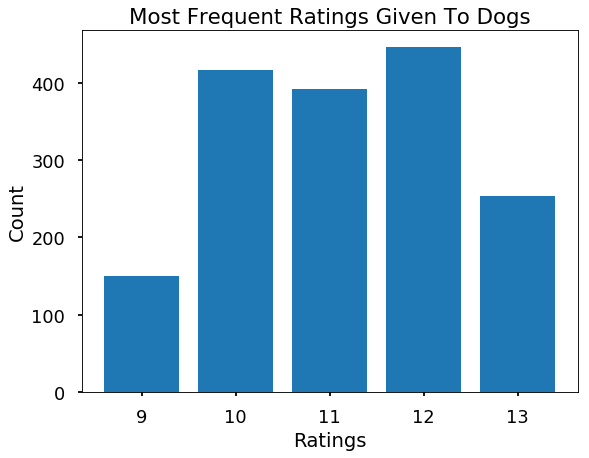

In [75]:
ratings = top_numerators.Rating.values
counts = top_numerators.Count.values
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(ratings, counts)
plt.title('Most Frequent Ratings Given To Dogs')
plt.xlabel('Ratings')
plt.ylabel('Count');
plt.savefig('frequent_dog_ratings.png', dpi=300, bbox_inches='tight')

### 1st insight: The most frequent ratings given to dogs were [12,10,11,13,9] from the highest to lowest.

#### 2nd Insight & Visualization: What were the breeds predicted by the neural network that were most mentioned in tweets? 

In [76]:
top_breeds = image_predictions_df_clean.prediction.value_counts().nlargest(10).to_frame().reset_index()

In [77]:
top_breeds.columns=['Breed', 'Count']

In [78]:
top_breeds

,Breed,Count
0,golden_retriever,290
1,Labrador_retriever,283
2,Chihuahua,185
3,Pembroke,143
4,Cardigan,115
5,Pomeranian,109
6,toy_poodle,105
7,pug,97
8,chow,96
9,cocker_spaniel,95


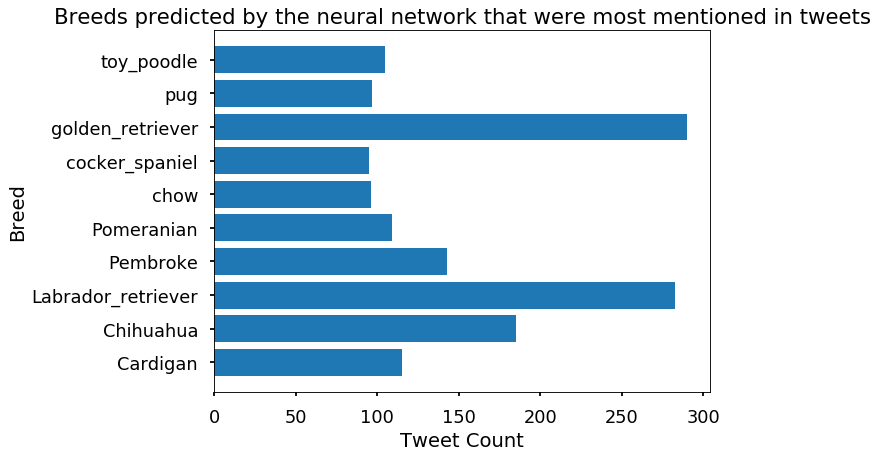

In [79]:
breeds = top_breeds.Breed.values
breeds_counts = top_breeds.Count.values
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(breeds, breeds_counts)
plt.title('Breeds predicted by the neural network that were most mentioned in tweets')
plt.xlabel('Tweet Count')
plt.ylabel('Breed');
plt.savefig('breeds predicted that were most mentioned.png', dpi=300, bbox_inches='tight')

### 2nd insight: The 5 most predicted breeds that were mentioned in tweets from the highest to lowest were:
- Golden Retriever
- Labrador Retriever
- Chihuahua
- Pembroke
- Pomeranian

#### 3rd Insight & Visualization: What is the average retweet and favorite count for the account by year? 

In [80]:
ret_year_15 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2015]['retweet_count'].mean()

In [81]:
ret_year_16 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2016]['retweet_count'].mean()

In [82]:
ret_year_17 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2017]['retweet_count'].mean()

In [83]:
fav_year_15 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2015]['favorite_count'].mean()

In [84]:
fav_year_16 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2016]['favorite_count'].mean()

In [85]:
fav_year_17 = archive_df_clean[archive_df_clean.timestamp.dt.year == 2017]['favorite_count'].mean()

In [86]:
retweet_years = [ret_year_15, ret_year_16, ret_year_17]

In [87]:
favorite_years = [fav_year_15, fav_year_16, fav_year_17]

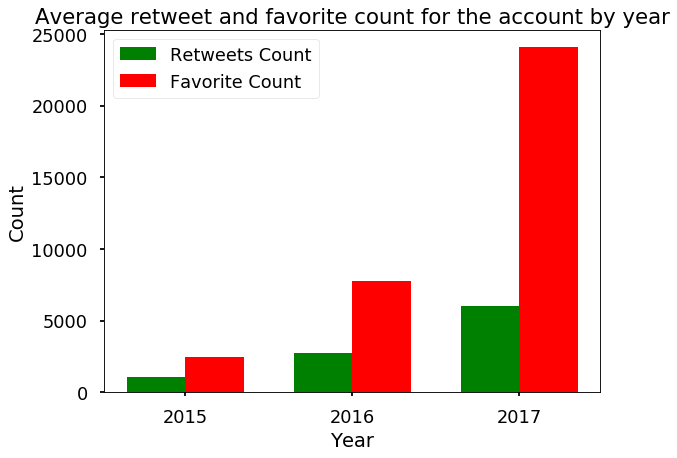

In [88]:
ind = np.arange(len(retweet_years))
width = 0.35
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
retweet_bars = plt.bar(ind, retweet_years, width, color='g', label='Retweets Count')
favorite_bars = plt.bar(ind+width, favorite_years, width, color='r', label='Favorite Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Average retweet and favorite count for the account by year')
locations = ind+width/2
labels = ['2015', '2016', '2017']
plt.xticks(locations, labels)
plt.legend();
plt.savefig('retweet and fav count by year.png', dpi=300, bbox_inches='tight')

### 3rd insight: 
- The account experienced an increase in the number of retweets and favorites each year. 
- However, the favorite account was always more which shows that is the easiest and most comfortable for the account followers to show appreciation and love for the account's tweets and the dogs. 
- The favorite count also showed a remarkable increase between the year 2016 and 2017 which shows that the number of the followers increased the most during this time for the account.

## Storing Data

In [89]:
archive_df_clean.to_csv('twitter_archive_master.csv', index=False)

In [90]:
api_df_clean.to_csv('twitter_api_data.csv', index=False)

In [91]:
image_predictions_df_clean.to_csv('image_prediction_for_tweets.csv', index=False)